In [1]:
#VAR forecast without OAS and OSS

In [ ]:
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff
import statsmodels as sm
#https://www.statsmodels.org/dev/vector_ar.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.simplefilter('ignore')
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [2]:
#https://stackoverflow.com/questions/20681297/vector-autoregressive-model-fitting-with-scikit-learn
#https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/
#https://blog.devgenius.io/implementing-vector-autoregression-from-scratch-with-python-b12eedbf35ad
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff

#Bayesian VAR
#https://github.com/joergrieger/pybvar

In [3]:
#RMSE loss function

In [4]:
train_df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/twitter_reddit_time_series_copy3.csv')
train_df = train_df.set_index('date')
#train = train.iloc[20:,:]
train_df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959,1.070900
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.069733
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.071044


In [5]:
X_train = train_df.drop(['BEIR','overall_sentiment_score_20d_lag', 'overall_attention_score_20d_lag'],axis=1)
y_train = train_df['BEIR']
X_test = train_df.drop(['BEIR','overall_sentiment_score_20d_lag', 'overall_attention_score_20d_lag'],axis=1)
y_test = train_df['BEIR']

In [20]:
#train_df = train.iloc[:,4:]
train_df = train_df.drop(['overall_sentiment_score_20d_lag', 'overall_attention_score_20d_lag'],axis=1)


KeyError: "['overall_sentiment_score_20d_lag' 'overall_attention_score_20d_lag'] not found in axis"

In [21]:
train_df

,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,
01/06/2021,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...
27/05/2022,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959,1.070900
28/05/2022,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.069733
29/05/2022,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.071044


In [22]:
#https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [24]:
#Visualising time series

In [25]:
#Granger causality test

In [26]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(train_df, variables = train_df.columns)  

,BEIR_x,interest_rate_1yr_lag_x,commodities_1yr_lag_x,UNRATENSA_1yr_lag_x,UMCSENT_2wk_lag_x,WM2NS_1yr_lag_x,gdp_1yr_lag_x,USDEUR_1yr_lag_x
BEIR_y,1.0000,0.2165,0.1209,0.0434,0.0020,0.0525,0.0704,0.0575
interest_rate_1yr_lag_y,0.0053,1.0000,0.0000,0.0004,0.0000,0.0000,0.0000,0.0000
commodities_1yr_lag_y,0.2413,0.2642,1.0000,0.4093,0.7968,0.0083,0.6282,0.0151
UNRATENSA_1yr_lag_y,0.4411,0.0425,0.8691,1.0000,0.2437,0.0375,0.2335,0.4836
UMCSENT_2wk_lag_y,0.2582,0.9392,0.0240,0.0204,1.0000,0.0461,0.0108,0.0425
WM2NS_1yr_lag_y,0.0458,0.1279,0.0206,0.0061,0.0018,1.0000,0.0004,0.3534
gdp_1yr_lag_y,0.1724,0.0109,0.0654,0.6144,0.3670,0.0074,1.0000,0.0119
USDEUR_1yr_lag_y,0.0308,0.1072,0.0361,0.2170,0.2927,0.0002,0.2348,1.0000


In [27]:
#Cointegration test

In [28]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(train_df)
#cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
BEIR   ::  153.84    > 143.6691  =>   True
interest_rate_1yr_lag ::  107.99    > 111.7797  =>   False
commodities_1yr_lag ::  74.89     > 83.9383   =>   False
UNRATENSA_1yr_lag ::  49.75     > 60.0627   =>   False
UMCSENT_2wk_lag ::  30.69     > 40.1749   =>   False
WM2NS_1yr_lag ::  14.72     > 24.2761   =>   False
gdp_1yr_lag ::  6.49      > 12.3212   =>   False
USDEUR_1yr_lag ::  0.18      > 4.1296    =>   False


In [29]:
#Train test split

In [30]:
nobs = 31
df_train, df_test = train_df[0:-nobs], train_df[-nobs:]

In [31]:
df_train
#df_test1

,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,
01/06/2021,2.46,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,2.44,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,2.42,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,2.40,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,2.40,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...
26/04/2022,2.85,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.066100
27/04/2022,2.88,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.054900
28/04/2022,2.97,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.050000


In [32]:
#Stationarity test

In [33]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')
    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [34]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    #print(name, column)

    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0529
 No. Lags Chosen       = 0
 Critical value 1%     = -3.45
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.7335. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "interest_rate_1yr_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6813
 No. Lags Chosen       = 2
 Critical value 1%     = -3.45
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.4408. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "commodities_1yr_lag" 
    -----------------------------------------------
 Null 

In [35]:
train_df_differenced = df_train.diff().dropna()

In [36]:
for name, column in train_df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -19.0582
 No. Lags Chosen       = 0
 Critical value 1%     = -3.45
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "interest_rate_1yr_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.3405
 No. Lags Chosen       = 3
 Critical value 1%     = -3.45
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "commodities_1yr_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.


In [37]:
df_train

,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,
01/06/2021,2.46,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,2.44,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,2.42,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,2.40,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,2.40,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...
26/04/2022,2.85,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.066100
27/04/2022,2.88,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.054900
28/04/2022,2.97,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.050000


In [38]:
train_df_differenced

,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,
02/06/2021,-0.02,0.01,0.0,0.0,0.0,0.0,0.0,-0.002800
03/06/2021,-0.02,0.00,0.0,0.0,0.0,0.0,0.0,-0.009100
04/06/2021,-0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.005100
05/06/2021,0.00,0.01,0.0,0.0,0.0,0.0,0.0,-0.000367
06/06/2021,0.00,0.00,0.0,0.0,0.0,0.0,0.0,-0.001456
...,...,...,...,...,...,...,...,...
26/04/2022,-0.06,0.00,0.0,0.0,0.0,-153.6,0.0,-0.004200
27/04/2022,0.03,0.00,0.0,0.0,0.0,0.0,0.0,-0.011200
28/04/2022,0.09,0.00,0.0,0.0,0.0,0.0,0.0,-0.004900


In [39]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')
    fig.suptitle(f"Historical trends of VAR {leveltype} variables", 
                 fontsize=14, fontweight="bold", fontname="Verdana")

In [40]:
#train_df_differenced.columns

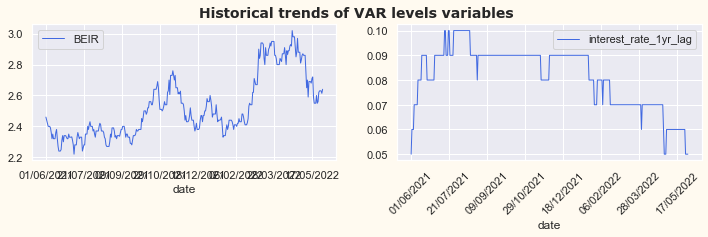

In [41]:
plot_vars(train_df, levels = ['BEIR', 'interest_rate_1yr_lag'], color="royalblue", leveltype="levels", name='levels1')

In [42]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')

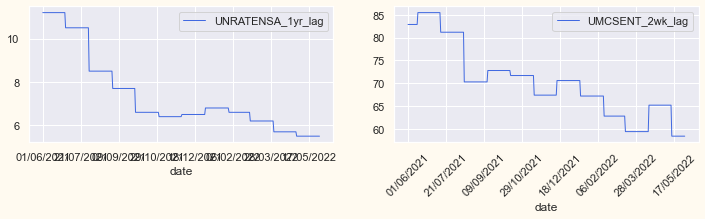

In [43]:
plot_vars(train_df, levels = ['UNRATENSA_1yr_lag', 'UMCSENT_2wk_lag'], color="royalblue", leveltype="levels", name='levels2')

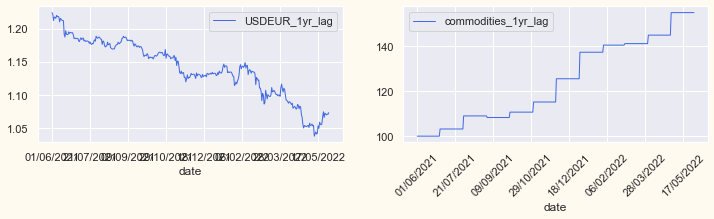

In [44]:
plot_vars(train_df, levels = ['USDEUR_1yr_lag', 'commodities_1yr_lag'], color="royalblue", leveltype="levels", name='levels3')

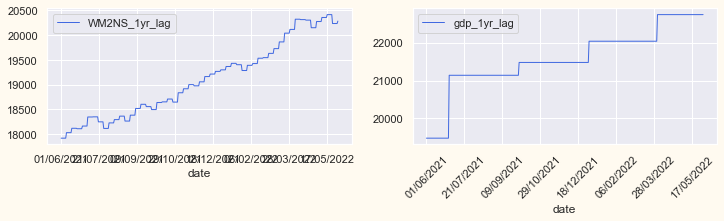

In [45]:
plot_vars(train_df, levels = ['WM2NS_1yr_lag', 'gdp_1yr_lag'], color="royalblue", leveltype="levels", name='levels4')

KeyError: 'overall_sentiment_score_20d_lag'

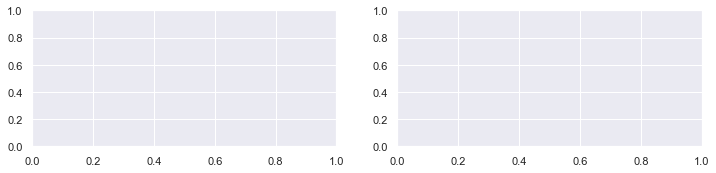

In [46]:
plot_vars(train_df, levels = ['overall_sentiment_score_20d_lag', 'overall_attention_score_20d_lag'], color="royalblue", leveltype="levels", name='levels5')

In [ ]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')
    fig.suptitle(f"Historical trends of VAR {leveltype} variables", 
                 fontsize=14, fontweight="bold", fontname="Verdana")

In [ ]:
plot_vars(train_df_differenced, levels = ['BEIR', 'interest_rate_1yr_lag'], color="firebrick", leveltype="difference", name='difference1')

In [47]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')

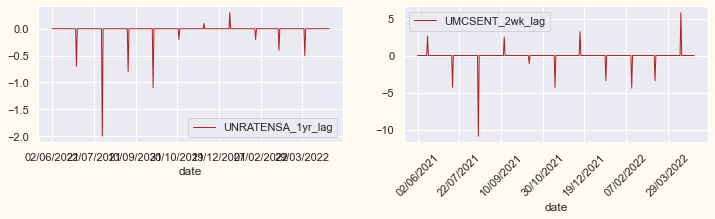

In [48]:
plot_vars(train_df_differenced, levels = ['UNRATENSA_1yr_lag', 'UMCSENT_2wk_lag'], color="firebrick", leveltype="difference", name='difference2')

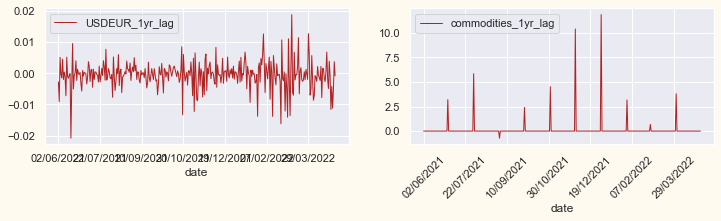

In [49]:
plot_vars(train_df_differenced, levels = ['USDEUR_1yr_lag', 'commodities_1yr_lag'], color="firebrick", leveltype="difference", name='difference3')

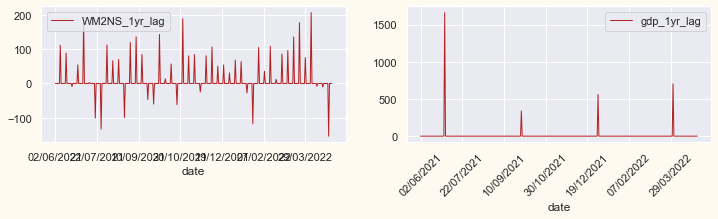

In [50]:
plot_vars(train_df_differenced, levels = ['WM2NS_1yr_lag', 'gdp_1yr_lag'], color="firebrick", leveltype="difference", name='difference4')

KeyError: 'overall_sentiment_score_20d_lag'

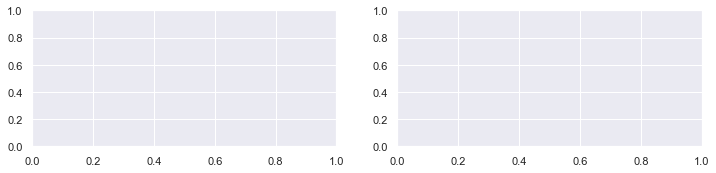

In [51]:
plot_vars(train_df_differenced, levels = ['overall_sentiment_score_20d_lag', 'overall_attention_score_20d_lag'], color="firebrick", leveltype="difference", name='difference5')

In [52]:
#Selecting appropriate lag
train_df_differenced

,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,
02/06/2021,-0.02,0.01,0.0,0.0,0.0,0.0,0.0,-0.002800
03/06/2021,-0.02,0.00,0.0,0.0,0.0,0.0,0.0,-0.009100
04/06/2021,-0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.005100
05/06/2021,0.00,0.01,0.0,0.0,0.0,0.0,0.0,-0.000367
06/06/2021,0.00,0.00,0.0,0.0,0.0,0.0,0.0,-0.001456
...,...,...,...,...,...,...,...,...
26/04/2022,-0.06,0.00,0.0,0.0,0.0,-153.6,0.0,-0.004200
27/04/2022,0.03,0.00,0.0,0.0,0.0,0.0,0.0,-0.011200
28/04/2022,0.09,0.00,0.0,0.0,0.0,0.0,0.0,-0.004900


In [53]:
model = VAR(train_df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    
#Almost all criteria hit minimum at 1 lag

Lag Order = 1
AIC :  -17.09955930185446
BIC :  -16.27434930859546
FPE :  3.7480201284990684e-08
HQIC:  -16.770466010864087 

Lag Order = 2
AIC :  -16.812863105476367
BIC :  -15.250663410457392
FPE :  4.9955190646318055e-08
HQIC:  -16.18979156488134 

Lag Order = 3
AIC :  -16.540283224618413
BIC :  -14.237802827975669
FPE :  6.571383640904696e-08
HQIC:  -15.621857204705178 

Lag Order = 4
AIC :  -16.354185170354395
BIC :  -13.308108434177928
FPE :  7.939977263589363e-08
HQIC:  -15.139018064496849 

Lag Order = 5
AIC :  -16.195249740163312
BIC :  -12.40223613177917
FPE :  9.355331830637415e-08
HQIC:  -14.681944457723338 

Lag Order = 6
AIC :  -15.912403256893247
BIC :  -11.369087088722841
FPE :  1.2509247963373556e-07
HQIC:  -14.09955211472316 

Lag Order = 7
AIC :  -15.740949313981941
BIC :  -10.443939479922987
FPE :  1.501086533171279e-07
HQIC:  -13.627133926506808 

Lag Order = 8
AIC :  -15.439632246415623
BIC :  -9.385511954688043
FPE :  2.058925550711099e-07
HQIC:  -13.0234234142731

In [54]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 12, Aug, 2022
Time:                     13:21:25
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -16.2743
Nobs:                     332.000    HQIC:                  -16.7705
Log likelihood:          -858.174    FPE:                3.74802e-08
AIC:                     -17.0996    Det(Omega_mle):     3.02602e-08
--------------------------------------------------------------------
Results for equation BEIR
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.001674         0.001994            0.839           0.401
L1.BEIR                         -0.051811         0.055712           -0.930           0.352
L1.interest_rate_

In [55]:
#Checking for serial correlation#
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(train_df_differenced.columns, out):
    print(str(col), ':', round(val, 2))

BEIR : 2.01
interest_rate_1yr_lag : 1.98
commodities_1yr_lag : 2.0
UNRATENSA_1yr_lag : 2.01
UMCSENT_2wk_lag : 2.01
WM2NS_1yr_lag : 2.01
gdp_1yr_lag : 2.0
USDEUR_1yr_lag : 2.07


In [56]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train_df_differenced.values[-lag_order:]
forecast_input

1


array([[ 0.        , -0.01      ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.00083333]])

In [57]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_train.index[-nobs:], columns=df_train.columns + '_1d')
df_forecast

,BEIR_1d,interest_rate_1yr_lag_1d,commodities_1yr_lag_1d,UNRATENSA_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d,gdp_1yr_lag_1d,USDEUR_1yr_lag_1d
date,,,,,,,,
31/03/2022,0.006820,0.000832,-0.127091,-0.040915,-0.050668,6.835067,39.734354,-0.000613
01/04/2022,-0.000071,0.000090,0.151008,-0.014719,-0.054342,5.974657,7.312218,-0.000444
02/04/2022,0.001427,-0.000050,0.139075,-0.016289,-0.053920,6.707016,9.687180,-0.000537
03/04/2022,0.001374,-0.000024,0.133547,-0.016782,-0.053044,6.766699,10.091759,-0.000503
04/04/2022,0.001332,-0.000023,0.134507,-0.016685,-0.053476,6.726621,9.951521,-0.000508
05/04/2022,0.001340,-0.000024,0.134554,-0.016684,-0.053411,6.731306,9.962605,-0.000508
06/04/2022,0.001340,-0.000024,0.134513,-0.016687,-0.053410,6.731777,9.965226,-0.000508
07/04/2022,0.001340,-0.000024,0.134519,-0.016687,-0.053412,6.731558,9.964450,-0.000508
08/04/2022,0.001340,-0.000024,0.134519,-0.016687,-0.053412,6.731578,9.964492,-0.000508


In [58]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [59]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)

In [71]:
df_train

,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,
01/06/2021,2.46,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,2.44,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,2.42,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,2.40,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,2.40,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...
26/04/2022,2.85,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.066100
27/04/2022,2.88,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.054900
28/04/2022,2.97,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.050000


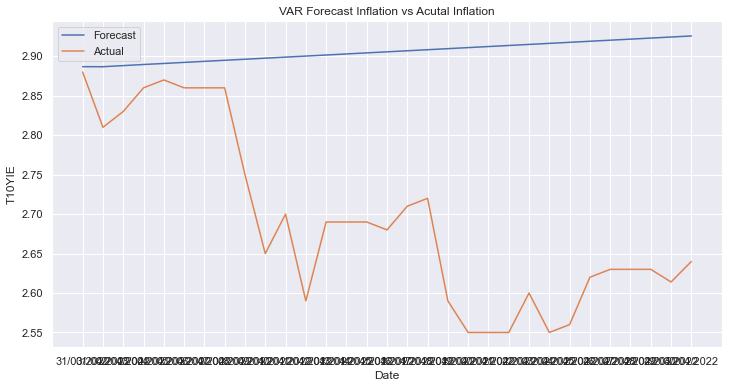

In [61]:
#Sentiment same plot
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
plt.savefig('var_trad_forecast.png')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

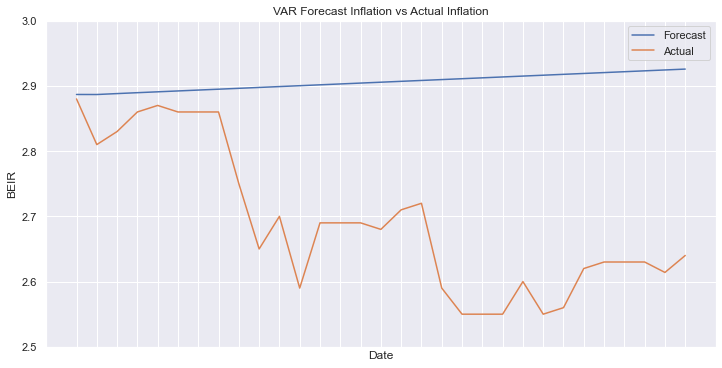

In [62]:
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('BEIR')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Actual Inflation')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylim(2.5,3)
# show a legend on the plot
plt.legend()
plt.savefig('var_forecast.png')
# Display a figure.
plt.show()

In [63]:
def train_test_plot(model, X_train, X_test, name):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,6))
    colors = sns.color_palette("deep", 8)
    plt.ylim(2.5,3)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"date": list(yvalues.index), "BEIR_fcast": forecasted})
    df_fcast = df_fcast.set_index("date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["BEIR_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
    df["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
    ax.set_title("BEIR vs. Model's BEIR")
    ax.set_ylabel("BEIR")
    ax.legend(["Forecasted BEIR","Actual BEIR"])
    plt.savefig(name)

In [64]:
df_results['BEIR_forecast']

date
31/03/2022    2.886820
01/04/2022    2.886749
02/04/2022    2.888176
03/04/2022    2.889550
04/04/2022    2.890882
05/04/2022    2.892223
06/04/2022    2.893563
07/04/2022    2.894903
08/04/2022    2.896244
09/04/2022    2.897584
10/04/2022    2.898924
11/04/2022    2.900264
12/04/2022    2.901604
13/04/2022    2.902944
14/04/2022    2.904285
15/04/2022    2.905625
16/04/2022    2.906965
17/04/2022    2.908305
18/04/2022    2.909645
19/04/2022    2.910986
20/04/2022    2.912326
21/04/2022    2.913666
22/04/2022    2.915006
23/04/2022    2.916346
24/04/2022    2.917687
25/04/2022    2.919027
26/04/2022    2.920367
27/04/2022    2.921707
28/04/2022    2.923047
29/04/2022    2.924388
30/04/2022    2.925728
Name: BEIR_forecast, dtype: float64

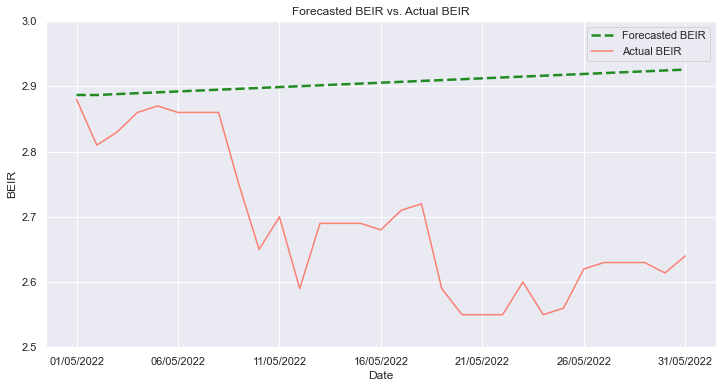

In [65]:
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("deep", 8)
plt.ylim(2.5,3)
    
yvalues = pd.DataFrame(y_test)
    
df_results['BEIR_forecast'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
df_test["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
ax.set_title("Forecasted BEIR vs. Actual BEIR")
ax.set_ylabel("BEIR")
ax.set_xlabel("Date")
ax.legend(["Forecasted BEIR","Actual BEIR"])
#plt.savefig('var_forecast.png')

In [66]:
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [67]:
#Forecast MSE
metrics.mean_squared_error(df_results['BEIR_forecast'], df_test['BEIR'], squared = False)

0.24585662441633044

In [68]:
rmse = metrics.mean_squared_error(df_results['BEIR_forecast'], df_test['BEIR'], squared = False)
error = (rmse/np.mean(df_test['BEIR']))*100
error
#We see that the RMSE is quite low compared to the mean (9.3% of the size of the mean overall), 
#which means that XGBoost did quite a good job at predicting the values of the test set. 

9.137021791193618

In [ ]:
y_test = df_test['BEIR']
y_pred = df_results['BEIR_forecast']
y_pred1 = pd.read_csv()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("deep", 8)
plt.ylim(2.5,3)
    
yvalues = pd.DataFrame(y_test)
    
y_pred['BEIR_forecast'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
y_pred2['BEIR_forecast'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="blue") # CPI fitted
y_test['BEIR'].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
ax.set_title("Forecasted BEIR vs. Actual BEIR")
ax.set_ylabel("BEIR")
ax.set_xlabel("Date")
ax.legend(["Forecasted BEIR - Including OSS & OAS","Forecasted BEIR - Excluding OSS & OAS",'Actual BEIR'])
plt.savefig('svr_forecast.png')